# **第3章　学校のクラス編成**

### **3.3 数理モデリングと実装**

### ②データの確認

In [1]:
# データ処理のためのライブラリpandasの取り込み
import pandas as pd

(1)生徒データ(students.csv)の確認

In [2]:
# students.csvからの生徒データの取得
s_df = pd.read_csv('students.csv')
print(len(s_df))
s_df.head()

318


,student_id,gender,leader_flag,support_flag,score
0,1,0,0,0,335
1,2,1,0,0,379
2,3,0,0,0,350
3,4,0,0,0,301
4,5,1,0,0,317


In [3]:
# 学籍番号の確認
s_df['student_id']

0        1
1        2
2        3
3        4
4        5
      ... 
313    314
314    315
315    316
316    317
317    318
Name: student_id, Length: 318, dtype: int64

In [4]:
# 最大値の確認
s_df['student_id'].max()

318

In [5]:
# 最小値の確認
s_df['student_id'].min()

1

In [6]:
# 1〜318まで隙間なく番号が振られているかの確認
set(range(1, 319)) == set(s_df['student_id'].tolist())

True

In [7]:
# 性別（gender）の確認
s_df['gender'].value_counts()

0    160
1    158
Name: gender, dtype: int64

In [8]:
# 学力試験の点数(score)の統計量の確認
s_df['score'].describe()

count    318.000000
mean     303.644654
std       65.179995
min       88.000000
25%      261.000000
50%      310.000000
75%      350.000000
max      485.000000
Name: score, dtype: float64

<AxesSubplot:>

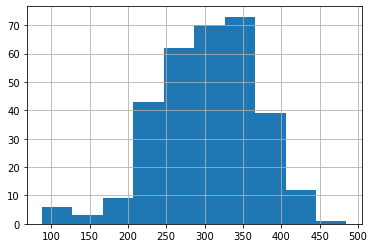

In [9]:
# 学力試験の点数(score)の分布の確認
s_df['score'].hist()

In [10]:
# リーダー気質フラグ(leader_flag)の確認
s_df['leader_flag'].value_counts()

0    301
1     17
Name: leader_flag, dtype: int64

In [11]:
# 特別支援フラグ(support_flag)の確認
s_df['support_flag'].value_counts()

0    314
1      4
Name: support_flag, dtype: int64

(2)特定ペアデータ(student_pairs.csv)の確認

In [12]:
# student_pairs.csvからの特定ペアデータの取得
s_pair_df = pd.read_csv('student_pairs.csv')
print(len(s_pair_df))
s_pair_df

3


,student_id1,student_id2
0,118,189
1,72,50
2,314,233


### ③数理モデリングと実装

In [13]:
# PythonライブラリPuLPの取り込み
import pulp

In [14]:
# 数理モデルのインスタンス作成
prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)

In [15]:
# 生徒のリスト
S = s_df['student_id'].tolist()
print(S)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [16]:
# クラスのリスト
C = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
C

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [17]:
# 生徒とクラスのペアのリスト
SC = [(s,c) for s in S for c in C]
print(SC[:30])

[(1, 'A'), (1, 'B'), (1, 'C'), (1, 'D'), (1, 'E'), (1, 'F'), (1, 'G'), (1, 'H'), (2, 'A'), (2, 'B'), (2, 'C'), (2, 'D'), (2, 'E'), (2, 'F'), (2, 'G'), (2, 'H'), (3, 'A'), (3, 'B'), (3, 'C'), (3, 'D'), (3, 'E'), (3, 'F'), (3, 'G'), (3, 'H'), (4, 'A'), (4, 'B'), (4, 'C'), (4, 'D'), (4, 'E'), (4, 'F')]


In [18]:
# 生徒をどのクラスに割り当てるかを変数として定義
x = pulp.LpVariable.dicts('x', SC, cat='Binary')

In [19]:
# (1)各生徒は１つのクラスに割り当てる
for s in S:
    prob += pulp.lpSum([x[s,c] for c in C]) == 1

In [20]:
# (2)各クラスの生徒の人数は39人以上、40人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S]) >= 39
    prob += pulp.lpSum([x[s,c] for s in S]) <= 40

In [21]:
# 男子生徒のリスト
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

# 女子生徒のリスト
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒、女子生徒の人数は20人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20

In [22]:
# 学力を辞書表現に変換
score = {row.student_id:row.score for row in s_df.itertuples()}

# 平均点の算出
score_mean = s_df['score'].mean()
print(score_mean)
    
# (4) 各クラスの学力試験の平均点は学年平均点±10点とする。    
for c in C:
    prob += (score_mean - 10) * pulp.lpSum([x[s,c] for s in S]) <= pulp.lpSum([x[s,c] * score[s] for s in S]) 
    prob += pulp.lpSum([x[s,c] * score[s] for s in S]) <= (score_mean + 10) * pulp.lpSum([x[s,c] for s in S])

303.6446540880503


In [23]:
# リーダー気質の生徒の集合
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

# (5)各クラスにリーダー気質の生徒を2人以上割り当てる。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2

In [24]:
# 特別な支援が必要な生徒の集合
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに1人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1

In [25]:
# 生徒の特定ペアリスト
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない。
for s1, s2 in SS:
    for c in C:
        prob += x[s1,c] + x[s2,c] <= 1

In [26]:
# prob # 追記

In [27]:
# 求解
status = prob.solve()
print(status)
print(pulp.LpStatus[status])

1
Optimal


In [28]:
# 最適化結果の表示
# 各クラスに割り当てられている生徒のリストを辞書に格納
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s,c].value()==1]
            
for c, Ss in C2Ss.items():
    print('Class:', c)
    print('Num:', len(Ss))
    print('Student:', Ss)
    print()

Class: A
Num: 40
Student: [2, 9, 19, 39, 42, 63, 65, 71, 79, 83, 85, 88, 99, 101, 109, 111, 123, 126, 136, 138, 145, 148, 165, 168, 173, 177, 179, 180, 193, 199, 206, 224, 233, 240, 246, 264, 267, 291, 292, 298]

Class: B
Num: 39
Student: [1, 11, 15, 43, 48, 50, 70, 82, 89, 91, 102, 104, 113, 114, 120, 121, 124, 127, 134, 149, 159, 167, 170, 176, 190, 203, 213, 220, 222, 231, 238, 245, 270, 275, 276, 283, 287, 290, 317]

Class: C
Num: 40
Student: [3, 14, 23, 25, 27, 31, 33, 41, 49, 53, 54, 58, 73, 93, 97, 98, 107, 122, 152, 156, 160, 171, 187, 210, 211, 217, 219, 227, 236, 242, 254, 258, 260, 268, 273, 274, 277, 278, 301, 318]

Class: D
Num: 40
Student: [10, 13, 16, 20, 36, 37, 51, 56, 59, 61, 67, 68, 75, 84, 92, 108, 128, 139, 140, 142, 146, 158, 161, 175, 183, 192, 198, 200, 221, 225, 235, 241, 252, 255, 256, 257, 266, 284, 293, 316]

Class: E
Num: 40
Student: [4, 5, 21, 22, 24, 38, 69, 72, 78, 87, 96, 105, 106, 115, 129, 132, 141, 143, 150, 154, 164, 166, 184, 189, 195, 196, 197, 24

In [29]:
import pandas as pd
import pulp

s_df = pd.read_csv('students.csv')
s_pair_df = pd.read_csv('student_pairs.csv')

prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)

# 生徒のリスト
S = s_df['student_id'].tolist()

# クラスのリスト
C = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# 生徒とクラスのペアのリスト
SC = [(s,c) for s in S for c in C]

# 生徒をどのクラスに割り当てるを変数として定義
x = pulp.LpVariable.dicts('x', SC, cat='Binary')

# (1)各生徒は１つのクラスに割り当てる
for s in S:
    prob += pulp.lpSum([x[s,c] for c in C]) == 1

# (2)各クラスの生徒の人数は39人以上、40人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S]) >= 39
    prob += pulp.lpSum([x[s,c] for s in S]) <= 40

# 男子生徒のリスト
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

# 女子生徒のリスト
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒、女子生徒の人数は20人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20

# 学力を辞書表現に変換
score = {row.student_id:row.score for row in s_df.itertuples()}

# 平均点の算出
score_mean = s_df.score.mean()

# (4) 各クラスの学力試験の平均点は学年平均点±10点とする。
for c in C:
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) >= (score_mean - 10) * pulp.lpSum([x[s,c] for s in S])
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) <= (score_mean + 10) * pulp.lpSum([x[s,c] for s in S])

# リーダー気質の生徒の集合
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

# (5)各クラスにリーダー気質の生徒を2人以上割り当てる。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2

# 特別な支援が必要な生徒の集合
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに1人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1

    # 生徒の特定ペアリスト
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない。
for row in s_pair_df.itertuples():
    s1 = row.student_id1
    s2 = row.student_id2
    for c in C:
        prob += x[s1,c] + x[s2,c] <= 1

# 求解
status = prob.solve()
print('Status:', pulp.LpStatus[status])

# 最適化結果の表示
# 各クラスに割り当てられている生徒のリストを辞書に格納
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s,c].value()==1]

for c, Ss in C2Ss.items():
    print('Class:', c)
    print('Num:', len(Ss))
    print('Student:', Ss)
    print()

Status: Optimal
Class: A
Num: 40
Student: [2, 9, 19, 39, 42, 63, 65, 71, 79, 83, 85, 88, 99, 109, 111, 123, 126, 136, 138, 145, 148, 165, 168, 173, 177, 179, 180, 193, 199, 206, 224, 233, 237, 240, 246, 264, 267, 291, 292, 298]

Class: B
Num: 40
Student: [11, 15, 48, 50, 70, 82, 89, 91, 102, 104, 113, 114, 120, 121, 124, 127, 146, 149, 159, 167, 170, 172, 176, 190, 203, 212, 213, 220, 222, 231, 238, 245, 263, 270, 275, 276, 283, 287, 290, 317]

Class: C
Num: 40
Student: [1, 3, 14, 23, 25, 27, 31, 33, 41, 49, 53, 54, 58, 73, 93, 97, 98, 122, 152, 156, 160, 171, 187, 210, 211, 217, 219, 227, 236, 242, 250, 254, 258, 260, 268, 273, 277, 278, 301, 318]

Class: D
Num: 40
Student: [10, 13, 16, 36, 37, 43, 51, 56, 59, 61, 67, 68, 75, 84, 92, 108, 128, 134, 139, 140, 158, 161, 175, 188, 192, 198, 200, 205, 218, 221, 225, 241, 252, 255, 256, 257, 261, 266, 293, 316]

Class: E
Num: 40
Student: [4, 5, 21, 22, 24, 38, 69, 72, 78, 87, 96, 105, 106, 115, 129, 132, 141, 143, 150, 154, 164, 166, 183, 

### 3.4 **数理モデルの検証**

### ①解が要件を満たしているかどうか確認する

要件(1) 学年の全生徒をそれぞれ①つのクラスに割り当てる

In [30]:
for s in S:
    # 割り当てられたクラスを取得
    assigned_class = [x[s,c].value() for c in C if x[s,c].value()==1]

    # 1つのクラスに割り当てられているか確認
    if len(assigned_class) != 1:
        print('error:', s, assigned_class)

検証用データフレームの作成

In [31]:
# 検証用のデータフレームの用意
result_df = s_df.copy()

# 各生徒がどのクラスに割り当てられたかの情報を辞書に格納
S2C = {s:c for s in S for c in C if x[s,c].value()==1}

# 生徒データに各生徒がどのクラスに割り当てられたかの情報を結合            
result_df['assigned_class'] = result_df['student_id'].map(S2C)
result_df.head(5)

,student_id,gender,leader_flag,support_flag,score,assigned_class
0,1,0,0,0,335,C
1,2,1,0,0,379,A
2,3,0,0,0,350,C
3,4,0,0,0,301,E
4,5,1,0,0,317,E


要件(2) 各クラスの生徒の人数は39人以上、40人以下とする

In [32]:
result_df.groupby('assigned_class')['student_id'].count()

assigned_class
A    40
B    40
C    40
D    40
E    40
F    39
G    40
H    39
Name: student_id, dtype: int64

(3) 各クラスの男子生徒、女子生徒の人数は20人以下とする。

In [33]:
result_df.groupby(['assigned_class', 'gender'])['student_id'].count()

assigned_class  gender
A               0         20
                1         20
B               0         20
                1         20
C               0         20
                1         20
D               0         20
                1         20
E               0         20
                1         20
F               0         20
                1         19
G               0         20
                1         20
H               0         20
                1         19
Name: student_id, dtype: int64

(4) 各クラスの学力試験の平均点は学年平均点±10点とする。

In [34]:
result_df.groupby('assigned_class')['score'].mean()

assigned_class
A    313.400000
B    293.825000
C    311.250000
D    313.250000
E    295.650000
F    295.666667
G    311.900000
H    293.769231
Name: score, dtype: float64

(5) 各クラスにリーダー気質の生徒を2人以上割り当てる。

In [35]:
result_df.groupby(['assigned_class'])['leader_flag'].sum()

assigned_class
A    3
B    2
C    2
D    2
E    2
F    2
G    2
H    2
Name: leader_flag, dtype: int64

(6) 特別な支援が必要な生徒は各クラスに1人以下とする。

In [36]:
result_df.groupby(['assigned_class'])['support_flag'].sum()

assigned_class
A    0
B    1
C    1
D    0
E    1
F    0
G    1
H    0
Name: support_flag, dtype: int64

(7) 特定ペアの生徒は同一クラスに割り当てない。

In [37]:
for i, (s1, s2) in enumerate(SS):
    print('case:',i)
    c1 = S2C[s1]
    c2 = S2C[s2]
    print('s1:{}-{}'.format(s1, c1))
    print('s2:{}-{}'.format(s2, c2))
    print('')

case: 0
s1:118-G
s2:189-E

case: 1
s1:72-E
s2:50-B

case: 2
s1:314-H
s2:233-A



### ②設定した制約の見直しと課題の洗い出し

In [38]:
# データの可視化ライブラリmatplotlibの取り込み
import matplotlib.pyplot as plt

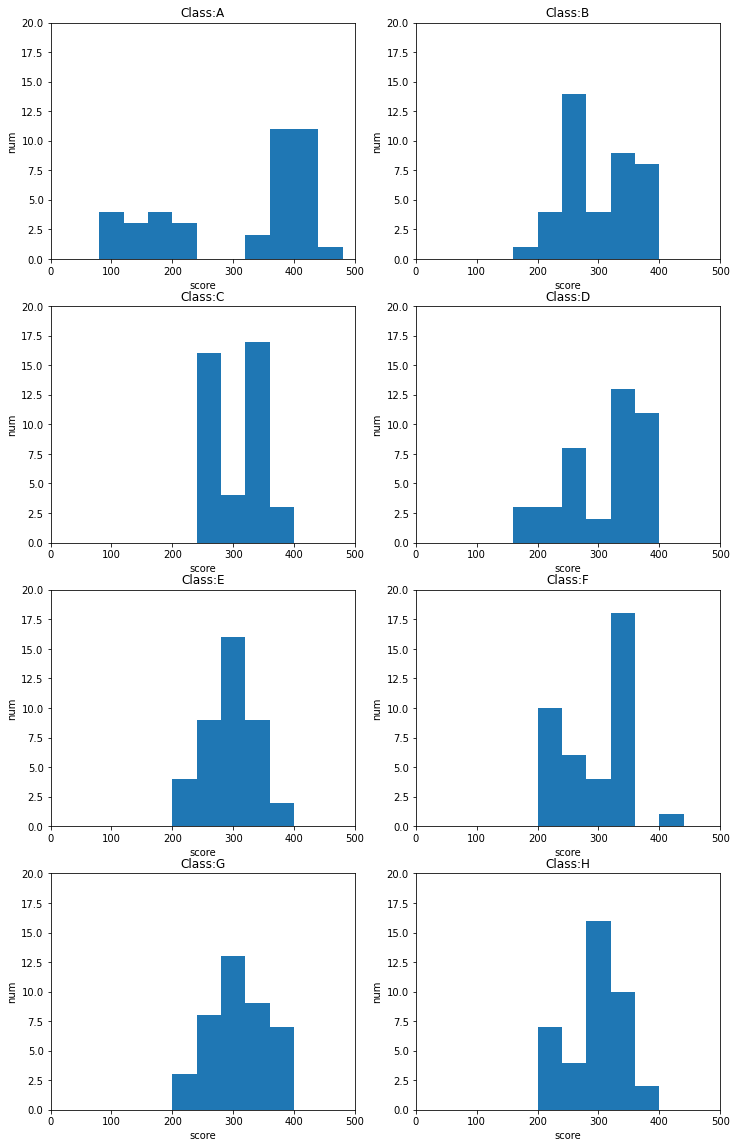

In [39]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
    cls_df = result_df[result_df['assigned_class']==c]
    ax = fig.add_subplot(4
                         , 2
                         , i+1
                         , xlabel='score'
                         , ylabel='num'
                         , xlim=(0, 500)
                         , ylim=(0, 20)
                         , title='Class:{:s}'.format(c)
                        )
    ax.hist(cls_df['score'], bins=range(0,500,40))

### ③制約の改善と数理最適化モデルの修正

In [40]:
# 初期クラス編成のデータを作成
# 学力をもとに順位を付与
s_df['score_rank'] = s_df['score'].rank(ascending=False, method='first') 

# 学力順にクラス編成し、init_assigned_classカラムを作成
class_dic = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
s_df['init_assigned_class'] = s_df['score_rank'].map(lambda x:x % 8).map(class_dic)
s_df.head()

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class
0,1,0,0,0,335,109.0,F
1,2,1,0,0,379,38.0,G
2,3,0,0,0,350,79.0,H
3,4,0,0,0,301,172.0,E
4,5,1,0,0,317,147.0,D


In [41]:
# init_flagを作成
init_flag = {(s,c):0 for s in S for c in C}

for row in s_df.itertuples():
    init_flag[row.student_id, row.init_assigned_class] = 1

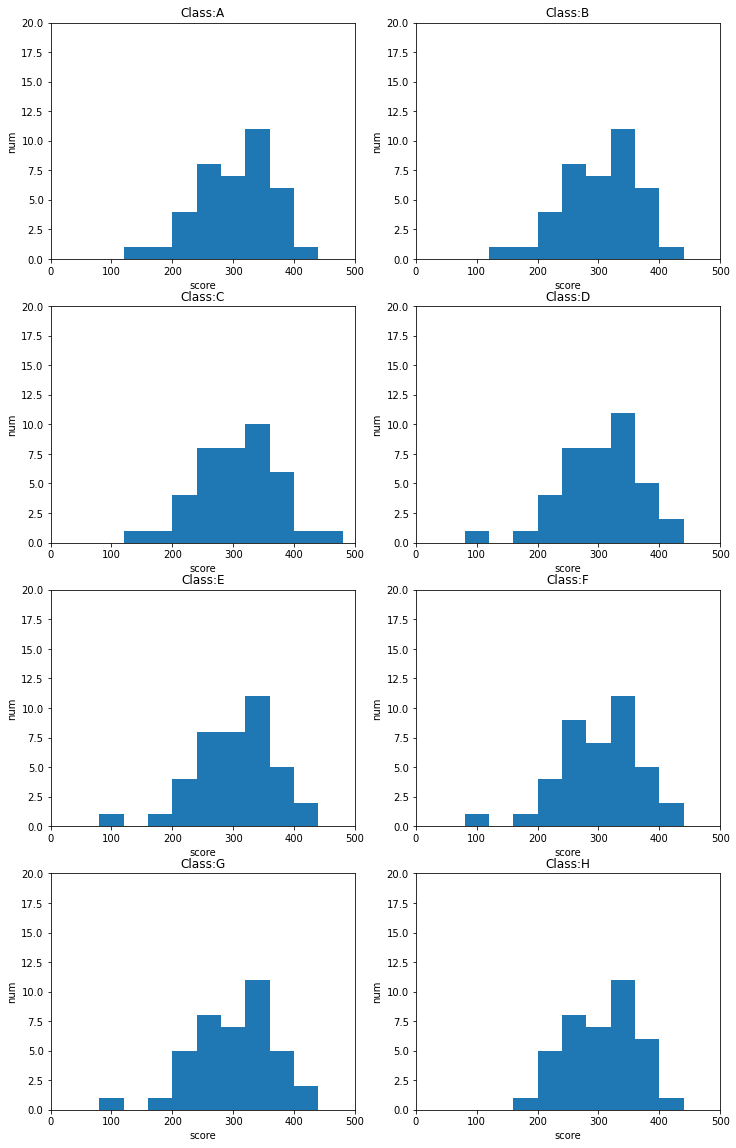

In [42]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
    cls_df = s_df[s_df['init_assigned_class']==c]
    ax = fig.add_subplot(4
                         , 2
                         , i+1
                         , xlabel='score'
                         , ylabel='num'
                         , xlim=(0, 500)
                         , ylim=(0, 20)
                         , title='Class:{:s}'.format(c)
                        )
    ax.hist(cls_df['score'], bins=range(0,500,40))

### コード全体

In [43]:
import pandas as pd
import pulp

s_df = pd.read_csv('students.csv')
s_pair_df = pd.read_csv('student_pairs.csv')

prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)

# 生徒のリスト
S = s_df['student_id'].tolist()

# クラスのリスト
C = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# 生徒とクラスのペアのリスト
SC = [(s,c) for s in S for c in C]

# 生徒をどのクラスに割り当てるを変数として定義
x = pulp.LpVariable.dicts('x', SC, cat='Binary')

# (1)各生徒は１つのクラスに割り当てる
for s in S:
    prob += pulp.lpSum([x[s,c] for c in C]) == 1

# (2)各クラスの生徒の人数は39人以上、40人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S]) >= 39
    prob += pulp.lpSum([x[s,c] for s in S]) <= 40

# 男子生徒のリスト
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

# 女子生徒のリスト
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒、女子生徒の人数は20人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20

# 学力を辞書表現に変換
score = {row.student_id:row.score for row in s_df.itertuples()}

# 平均点の算出
score_mean = s_df['score'].mean()

# (4) 各クラスの学力試験の平均点は学年平均点±10点とする。      
for c in C:
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) >= (score_mean - 10) * pulp.lpSum([x[s,c] for s in S])
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) <= (score_mean + 10) * pulp.lpSum([x[s,c] for s in S])

# リーダー気質の生徒の集合
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

# (5)各クラスにリーダー気質の生徒を2人以上割り当てる。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2

# 特別な支援が必要な生徒の集合
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに1人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1

# 生徒の特定ペアリスト
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない。
for s1, s2 in SS:
    for c in C:
        prob += x[s1,c] + x[s2,c] <= 1

# 初期クラス編成を作成
s_df['score_rank'] = s_df['score'].rank(ascending=False, method='first')
class_dic = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
s_df['init_assigned_class'] = s_df['score_rank'].map(lambda x:x % 8).map(class_dic)
init_flag = {(s,c): 0 for s in S for c in C}
for row in s_df.itertuples():
    init_flag[row.student_id, row.init_assigned_class] = 1
    
# 目的関数:初期クラス編成と最適化結果のクラス編成をできるだけ一致させる
prob += pulp.lpSum([x[s,c] * init_flag[s,c] for s,c in SC])        

# 求解        
status = prob.solve()
print('Status:', pulp.LpStatus[status])

# 最適化結果の表示
# 各クラスに割り当てられている生徒のリストを辞書に格納
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s,c].value()==1]
    
for c, Ss in C2Ss.items():
    print('Class:', c)
    print('Num:', len(Ss))
    print('Student:', Ss)
    print()

Status: Optimal
Class: A
Num: 40
Student: [2, 23, 56, 68, 76, 82, 89, 102, 106, 113, 115, 121, 123, 124, 127, 140, 172, 173, 185, 186, 204, 210, 228, 255, 267, 273, 274, 280, 285, 288, 289, 292, 295, 297, 304, 308, 311, 313, 316, 318]

Class: B
Num: 39
Student: [11, 14, 17, 30, 32, 35, 41, 49, 64, 66, 79, 83, 86, 88, 97, 114, 119, 122, 132, 134, 141, 149, 151, 165, 175, 178, 190, 198, 200, 209, 213, 216, 226, 237, 272, 296, 303, 306, 307]

Class: C
Num: 40
Student: [21, 38, 44, 46, 51, 54, 62, 63, 73, 75, 84, 85, 99, 120, 138, 142, 143, 144, 150, 166, 183, 184, 192, 193, 195, 201, 205, 207, 211, 212, 217, 221, 222, 243, 244, 263, 264, 287, 299, 315]

Class: D
Num: 40
Student: [5, 24, 39, 47, 50, 61, 67, 74, 90, 92, 93, 100, 109, 116, 131, 136, 147, 152, 155, 167, 169, 170, 176, 177, 196, 199, 214, 218, 219, 227, 230, 231, 236, 238, 239, 253, 257, 259, 271, 309]

Class: E
Num: 39
Student: [4, 8, 12, 13, 19, 22, 33, 43, 48, 55, 57, 59, 98, 112, 125, 130, 133, 137, 139, 153, 160, 189, 203

In [44]:
# 検証用のデータフレームの用意
result_df2 = s_df.copy()

# 各生徒がどのクラスに割り当てられたかの情報を辞書に格納
S2C = {}
for s in S:
    S2C[s] = [c for c in C if x[s,c].value()==1][0]

# 生徒データに各生徒が度のクラスに割り当てられたかの情報を結合            
result_df2['assigned_class'] = result_df2['student_id'].map(S2C)
result_df2.head(5)

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class,assigned_class
0,1,0,0,0,335,109.0,F,F
1,2,1,0,0,379,38.0,G,A
2,3,0,0,0,350,79.0,H,H
3,4,0,0,0,301,172.0,E,E
4,5,1,0,0,317,147.0,D,D


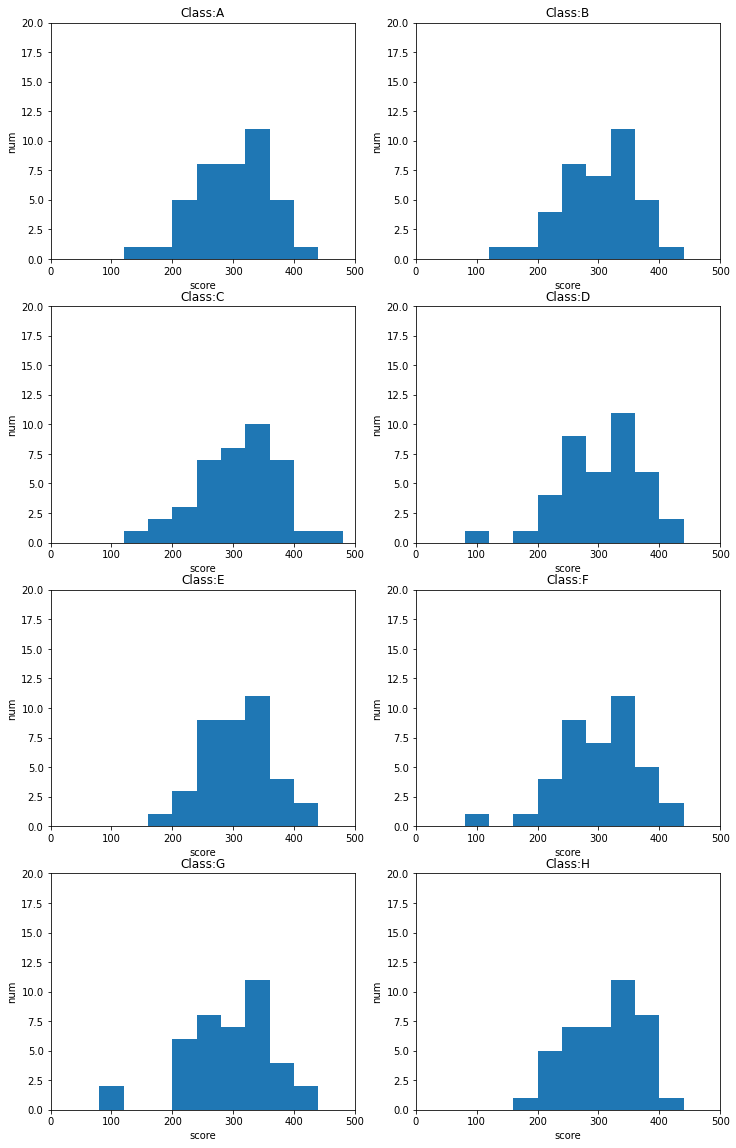

In [45]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
    cls_df = result_df2[result_df2['assigned_class']==c]
    ax = fig.add_subplot(4
                         , 2
                         , i+1
                         , xlabel='score'
                         , ylabel='num'
                         , xlim=(0, 500)
                         , ylim=(0, 20)
                         , title='Class:{:s}'.format(c)
                        )    
    ax.hist(cls_df['score'], bins=range(0,500,40))